In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [ ]:
x = data[:,:3]
y = data[:,3]

In [ ]:
new_column = np.ones(25)
x = np.insert(x, 0, new_column, axis=1)

ADAGRAD

In [ ]:
def adagrad(x , y , LR , epsilon ,iters):
  loss = []
  thetas = []
  theta = theta = np.zeros((x.shape[1]))
  hypos = []
  prev_cost = float('inf')
  m = len(x)
  v_theta = np.zeros((x.shape[1]))

  for i in range(iters):
    print("**********iteration",i,"**********\n")
    thetas.append(theta)
    h = np.dot(x, theta)
    hypos.append(h)
    print("h ", h,"\n")
    error_vec = h-y
    print("errorvec " ,error_vec,"\n")
    j = np.mean(error_vec**2) / 2
    loss.append(j)
    print("j ",j,"\n")
    gradvec = np.dot(x.T, error_vec) / m
    print("grad vector ", gradvec,"\n")
    gradvecNorm = np.linalg.norm(gradvec)
    print("grad vector norm ", gradvecNorm,"\n")


    if gradvecNorm < 0.001 or abs(prev_cost - j) < 0.001:
      break
    else:
      prev_cost = j
      v_theta = v_theta + (gradvec **2)
      theta = theta - (LR/ (np.sqrt(v_theta)+epsilon))* gradvec

  return thetas, loss, theta , h , hypos

In [ ]:
thetas, loss, theta , h , hypos = adagrad(x,y,0.05, 1e-08, 500) x,y,0.0005,0.9,1e-08,5000

Streaming output truncated to the last 5000 lines.
grad vector  [  -21.79870058 -1757.53020569 -1766.62157207 -1821.27670561] 

grad vector norm  3086.646760576919 

**********iteration 87 **********

h  [133.64455356 160.49186252 158.15649234 172.16402796 122.55694715
  90.46048683 128.97818931  95.71377633 149.98860098 138.90240955
 124.30870955 122.55901623 163.40787935 135.97729575 129.56216563
 162.82713752 129.55700484 154.65740285 155.82065843 139.47991689
 151.15531682 150.57145948 144.15153711 134.8093193  166.32717826] 

errorvec  [-18.35544644 -24.50813748 -21.84350766 -23.83597204 -19.44305285
 -10.53951317 -20.02181069 -19.28622367 -25.01139902 -25.09759045
 -16.69129045 -18.44098377 -20.59212065 -16.02270425 -18.43783437
 -29.17286248 -17.44299516 -28.34259715 -21.17934157 -19.52008311
 -25.84468318 -24.42854052 -30.84846289 -14.1906807  -25.67282174] 

j  240.09332064616873 

grad vector  [  -21.39082622 -1724.61251516 -1733.522704   -1787.40629529] 

grad vector norm  3

R2 =  0.9773092519052798


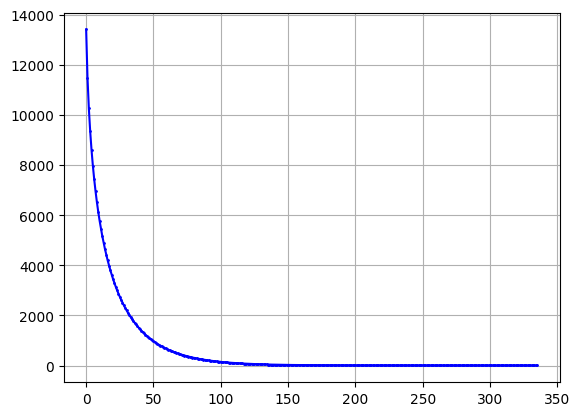

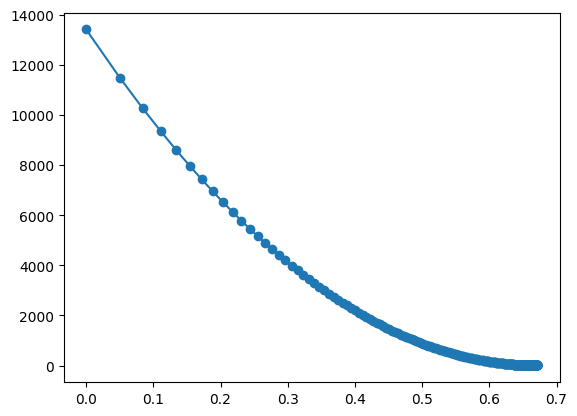

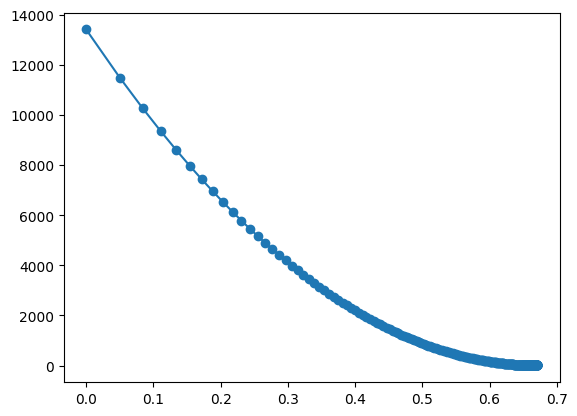

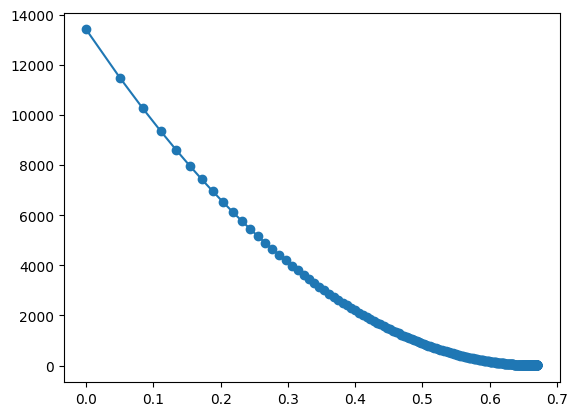

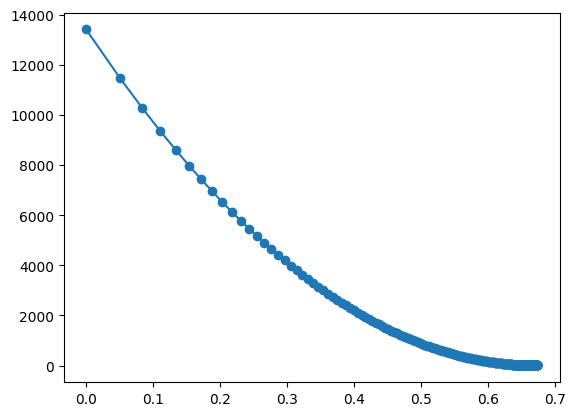

In [ ]:
from sklearn.metrics import r2_score
print(f"R2 = ",r2_score(h,y))

i = list(range(len(loss)))
plt.plot(i, loss, color='blue', marker='o', markersize = 1)
plt.grid(True)
plt.show()

for value in range(len(thetas[0])):
  theta = [arr[value] for arr in thetas]
  plt.plot(theta, loss, marker='o', linestyle='-')
  plt.show()

In [ ]:
thetas, loss, theta , h , hypos = adagrad(x,y,0.0005,1e-08,5000)

Streaming output truncated to the last 5000 lines.
**********iteration 4750 **********

h  [15.33808893 18.41910645 18.15118991 19.7586779  14.06549833 10.38168162
 14.80226634 10.98449073 17.21349619 15.94090898 14.2664363  14.06550329
 18.75399446 15.60599917 14.8692458  18.68702276 14.86923343 17.74932461
 17.88327227 16.00787293 17.34745213 17.28047296 16.54370811 15.4720402
 19.08889034] 

errorvec  [-136.66191107 -166.58089355 -161.84881009 -176.2413221  -127.93450167
  -90.61831838 -134.19773366 -104.01550927 -157.78650381 -148.05909102
 -126.7335637  -126.93449671 -165.24600554 -136.39400083 -133.1307542
 -173.31297724 -132.13076657 -165.25067539 -159.11672773 -142.99212707
 -159.65254787 -157.71952704 -158.45629189 -133.5279598  -172.91110966] 

j  10869.668657518449 

grad vector  [  -145.89816503 -11773.06150276 -11837.28944431 -12126.64326351] 

grad vector norm  20634.998465015266 

**********iteration 4751 **********

h  [15.33969042 18.42102964 18.15308513 19.76074096 14

R2 =  -3880.183928758258


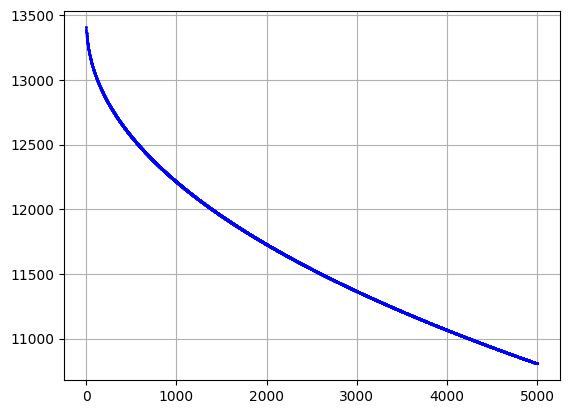

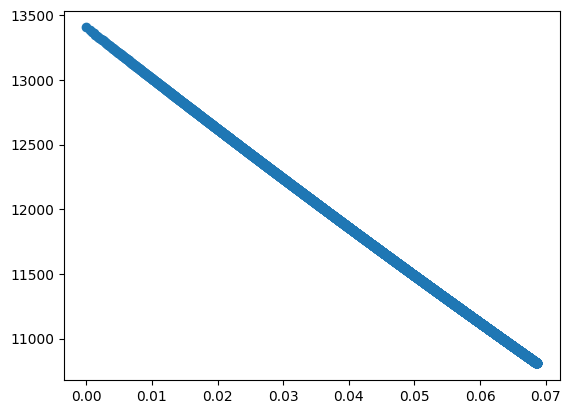

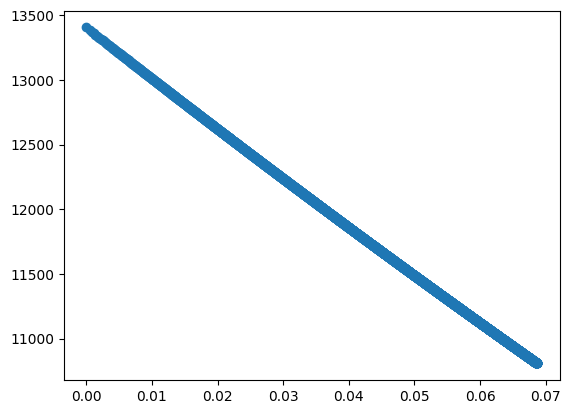

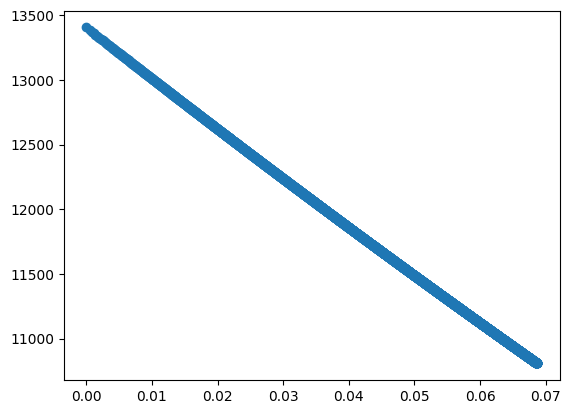

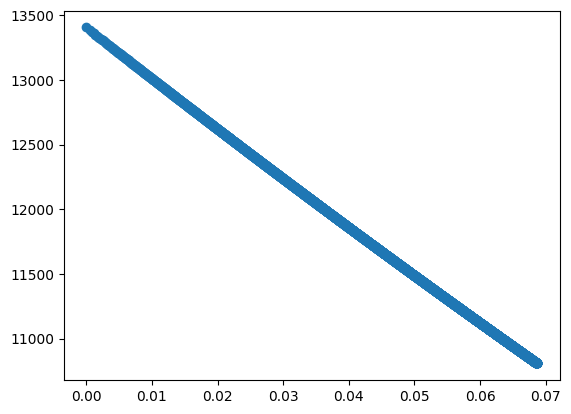

In [ ]:
from sklearn.metrics import r2_score
print(f"R2 = ",r2_score(h,y))

i = list(range(len(loss)))
plt.plot(i, loss, color='blue', marker='o', markersize = 1)
plt.grid(True)
plt.show()

for value in range(len(thetas[0])):
  theta = [arr[value] for arr in thetas]
  plt.plot(theta, loss, marker='o', linestyle='-')
  plt.show()

To fix the issue of effective learning rate aggressive decay, we use RMSPROP:

RMSPROP

In [ ]:
def rms(x , y , LR, beta , epsilon ,iters):
  loss = []
  thetas = []
  theta = theta = np.zeros((x.shape[1]))
  hypos = []
  prev_cost = float('inf')
  m = len(x)
  v_theta = np.zeros((x.shape[1]))

  for i in range(iters):
    print("**********iteration",i,"**********\n")
    thetas.append(theta)
    h = np.dot(x, theta)
    hypos.append(h)
    print("h ", h,"\n")
    error_vec = h-y
    print("errorvec " ,error_vec,"\n")
    j = np.mean(error_vec**2) / 2
    loss.append(j)
    print("j ",j,"\n")
    gradvec = np.dot(x.T, error_vec) / m
    print("grad vector ", gradvec,"\n")
    gradvecNorm = np.linalg.norm(gradvec)
    print("grad vector norm ", gradvecNorm,"\n")


    if gradvecNorm < 0.001 or abs(prev_cost - j) < 0.001:
      break
    else:
      prev_cost = j
      v_theta =beta* v_theta + (1-beta)*(gradvec **2)
      theta = theta - (LR/ (np.sqrt(v_theta)+epsilon))* gradvec

  return thetas, loss, theta , h , hypos

In [ ]:
thetas, loss, theta, h , hypos = rms(x,y,0.0005,0.9,1e-08,5000)

Streaming output truncated to the last 5000 lines.
  2.98242311  2.62432806  2.33087562 -3.83837605 -0.25297603 -3.55119973
  1.03997842  0.38420985 -1.96338364 -0.92380651 -8.35989892  3.8504326
 -0.87042008] 

j  3.78416848272562 

grad vector  [ 6.57990345e-03 -1.99915191e+00 -2.85009639e+00 -8.54665765e+00] 

grad vector norm  9.228491650308692 

**********iteration 1957 **********

h  [153.25768752 184.9958852  181.76714208 198.58433447 140.88452695
 105.15379072 149.53063428 112.01150585 173.95928255 162.73804075
 143.66143577 142.31711523 187.0979484  154.71927541 150.42483038
 188.27852575 146.83662248 179.5612859  178.14993459 159.48268994
 175.14591267 174.18434476 166.74405365 152.94435756 191.24783634] 

errorvec  [ 1.25768752e+00 -4.11480058e-03  1.76714208e+00  2.58433447e+00
 -1.11547305e+00  4.15379072e+00  5.30634276e-01 -2.98849415e+00
 -1.04071745e+00 -1.26195925e+00  2.66143577e+00  1.31711523e+00
  3.09794840e+00  2.71927541e+00  2.42483038e+00 -3.72147425e+00
 -1.

R2 =  0.9869832998771465


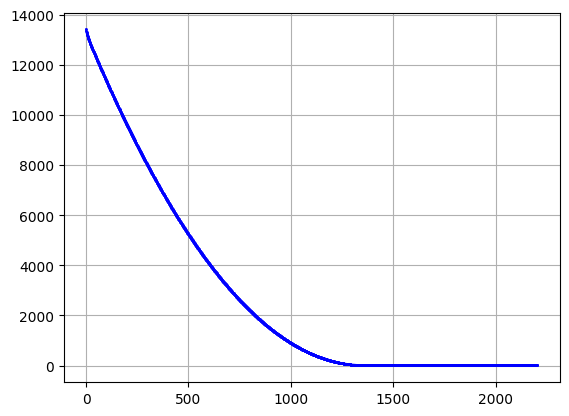

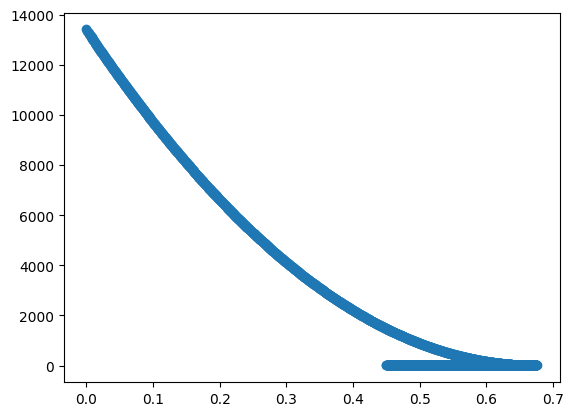

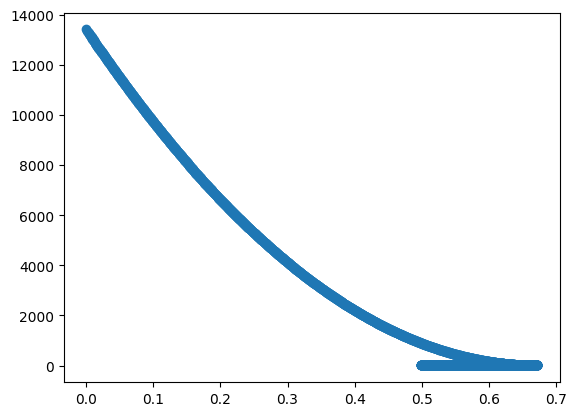

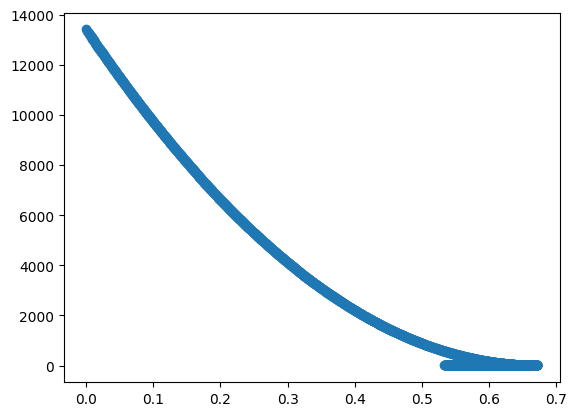

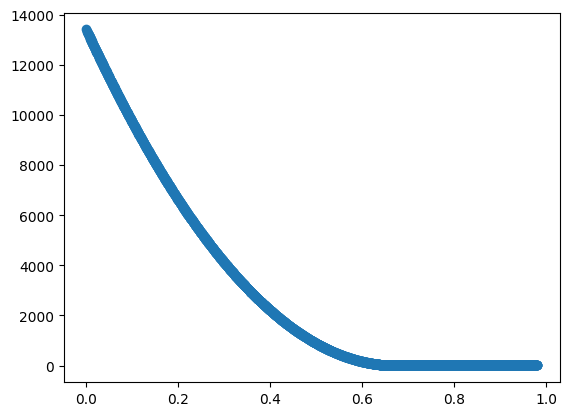

In [ ]:
print(f"R2 = ",r2_score(h,y))

i = list(range(len(loss)))
plt.plot(i, loss, color='blue', marker='o', markersize = 1)
plt.grid(True)
plt.show()

for value in range(len(thetas[0])):
  theta = [arr[value] for arr in thetas]
  plt.plot(theta, loss, marker='o', linestyle='-')
  plt.show()

For more experimentation with the hyperparameters, check out the single variable version



---



ADAM

In [ ]:
def adam(x , y , LR ,betam, betav, epsilon ,iters):
  loss = []
  thetas = []
  theta = np.zeros((x.shape[1]))
  hypos = []
  prev_cost = float('inf')
  l = len(x)
  m = np.zeros((x.shape[1]))
  v = np.zeros((x.shape[1]))

  for i in range(1,iters+1):
    print("**********iteration",i,"**********\n")
    thetas.append(theta)

    h = np.dot(x, theta)
    hypos.append(h)
    print("h ", h,"\n")

    error_vec = h-y
    print("errorvec " ,error_vec,"\n")

    j = np.mean(error_vec**2) / 2
    loss.append(j)
    print("j ",j,"\n")
    gradvec = np.dot(x.T, error_vec) / l
    print("grad vector ", gradvec,"\n")
    gradvecNorm = np.linalg.norm(gradvec)
    print("grad vector norm ", gradvecNorm,"\n")

    if gradvecNorm < 0.001 or abs(prev_cost - j) < 0.001:
      break
    else:
      prev_cost = j
      #update m
      m = betam*m + ((1-betam)*gradvec )

      #update v
      v = betav*v + (1-betav)*(gradvec **2)

      #get m hat for bias correction
      m_hat = m/(1-(betam**i))
      #get v hat
      v_hat = v/(1-(betav**i))

      theta = theta - (LR/ (np.sqrt(v_hat)+epsilon) )* m_hat

  return thetas, loss, theta , h , hypos

In [ ]:
thetas, loss, theta , h , hypos = adam(x , y , 0.005 ,0.5, 0.999, 1e-08 ,500)

Streaming output truncated to the last 5000 lines.
grad vector norm  3072.5285529709863 

**********iteration 189 **********

h  [133.64670839 160.49461905 158.15911388 172.16698802 122.55900428
  90.46218511 128.98051456  95.71564832 149.99134418 138.90519754
 124.31089162 122.56128163 163.41048301 135.97932106 129.56453809
 162.83001949 129.55885782 154.66022106 155.82309829 139.48210105
 151.15803004 150.57413741 144.15407988 134.81124781 166.32995935] 

errorvec  [-18.35329161 -24.50538095 -21.84088612 -23.83301198 -19.44099572
 -10.53781489 -20.01948544 -19.28435168 -25.00865582 -25.09480246
 -16.68910838 -18.43871837 -20.58951699 -16.02067894 -18.43546191
 -29.16998051 -17.44114218 -28.33977894 -21.17690171 -19.51789895
 -25.84196996 -24.42586259 -30.84592012 -14.18875219 -25.67004065] 

j  240.0403075004224 

grad vector  [  -21.38841636 -1724.41865166 -1733.32804903 -1787.2058857 ] 

grad vector norm  3028.6313994912616 

**********iteration 190 **********

h  [133.93826076 160

R2 =  0.9773394173421824


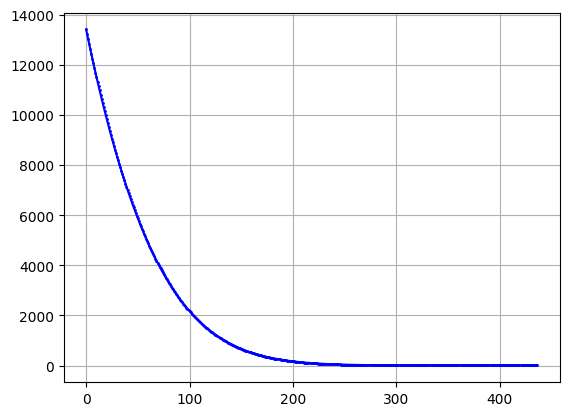

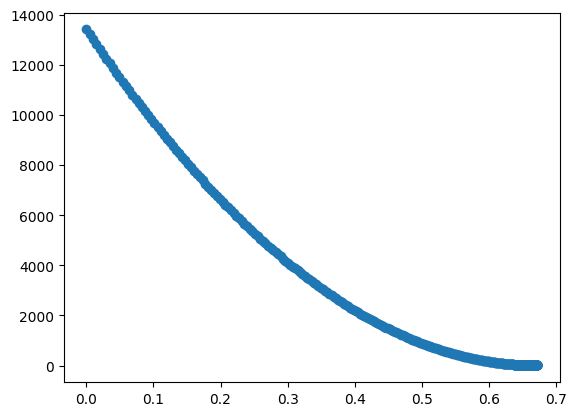

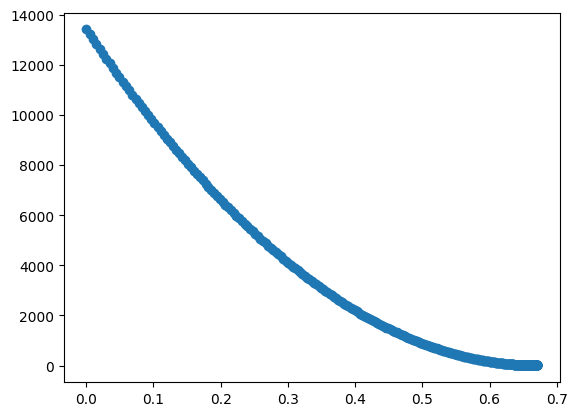

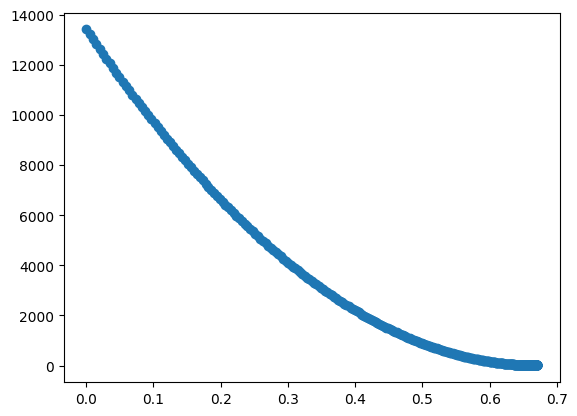

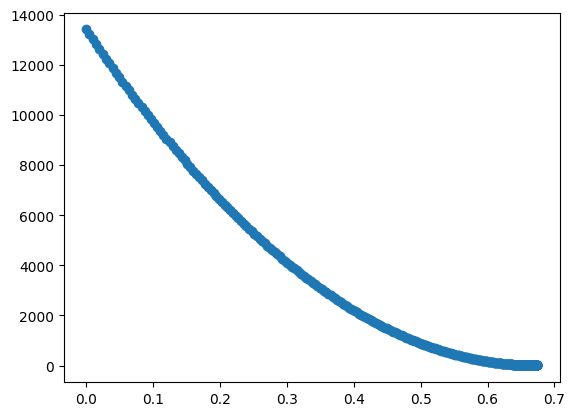

In [ ]:
print(f"R2 = ",r2_score(h,y))

i = list(range(len(loss)))
plt.plot(i, loss, color='blue', marker='o', markersize = 1)
plt.grid(True)
plt.show()

for value in range(len(thetas[0])):
  theta = [arr[value] for arr in thetas]
  plt.plot(theta, loss, marker='o', linestyle='-')
  plt.show()